In [180]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.lines as pltline
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
joined_data = pd.merge(ride_data, city_data, how = 'outer', on = 'city')

# Display the data table for preview
joined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

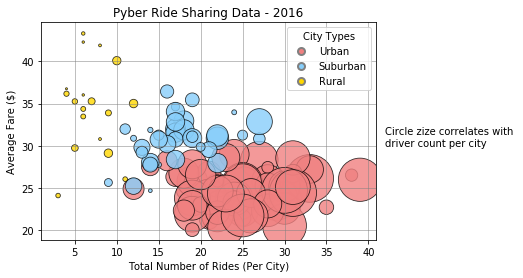

In [255]:
# Obtain the x and y coordinates for each of the three city types
# Create new DFs filtered for each city type, then group by city
    # to easily calculate data for each coordinate
urban_data = joined_data[joined_data['type'] == 'Urban']
urban_data_city = urban_data.groupby("city")
urban_x = urban_data_city['ride_id'].count()
urban_y = urban_data_city['fare'].mean()
urban_z = urban_data_city['driver_count'].sum().apply(lambda x: int(x))

suburban_data = joined_data[joined_data['type'] == "Suburban"]
suburban_data_city = suburban_data.groupby("city")
suburban_x = suburban_data_city['ride_id'].count()
suburban_y = suburban_data_city['fare'].mean()
suburban_z = suburban_data_city['driver_count'].sum().apply(lambda x: int(x))

rural_data = joined_data[joined_data['type'] == 'Rural']
rural_data_city = rural_data.groupby("city")
rural_x = rural_data_city['ride_id'].count()
rural_y = rural_data_city['fare'].mean()
rural_z = rural_data_city['driver_count'].sum().apply(lambda x: int(x))

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s = urban_z, alpha = 0.8, c = "lightcoral",\
            edgecolors = "black", linewidths = 0.8, label = "Urban")
plt.scatter(suburban_x, suburban_y, s = suburban_z, alpha = 0.8, linewidths = 0.8,\
            edgecolors = "black", c = "lightskyblue", label = "Suburban")
plt.scatter(rural_x, rural_y, s = rural_z, alpha = 0.8, linewidths = 0.8,\
            edgecolors = "black", c = "gold", label = "Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(which = "both", linewidth = .5, c="gray")
plt.title("Pyber Ride Sharing Data - 2016")

# Create a legend
# Use lines class to create legend markers that are a consistent size
rural_label = pltline.Line2D(range(2), range(2), color="white", marker='o',\
                             markerfacecolor = "gold", markersize = 7,\
                             markeredgewidth = 2, markeredgecolor = "gray")
urban_label = pltline.Line2D(range(2), range(2), color="white", marker='o',\
                             markerfacecolor = "lightcoral", markersize = 7,\
                             markeredgewidth = 2, markeredgecolor = "gray")
suburban_label = pltline.Line2D(range(2), range(2),color="white", marker='o',\
                                markerfacecolor = "lightskyblue", markersize = 7,\
                                markeredgewidth = 2, markeredgecolor = "gray")
plt.legend((urban_label, suburban_label, rural_label), ("Urban", "Suburban", "Rural"), loc = "best",\
                    title = "City Types")

# Incorporate a text label regarding circle size
plt.text(42, 30, "Circle zize correlates with \ndriver count per city")
# Save Figure
plt.savefig("pyber_bubble_plot.png", edgecolor = "gray")
# Show Plot
plt.show()

## Total Fares by City Type

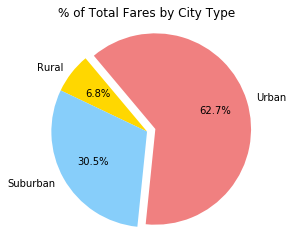

In [251]:
# Calculate Type Percents
type_and_fares = joined_data.loc[:, ['type', 'fare']]
fares_per_city = type_and_fares.groupby('type')['fare'].sum()

# Define reusable chart elements
colors = ("gold", "lightskyblue", "lightcoral")
labels = ("Rural", "Suburban", "Urban")
explode = (0, 0, 0.1)

# Build Pie Chart
colors = ("gold", "lightskyblue", "lightcoral")
labels = ("Rural", "Suburban", "Urban")
explode = (0, 0, 0.1)

plt.pie(fares_per_city,\
        colors = colors, labels = labels, explode = explode,\
        autopct = '%1.1f%%', pctdistance = .65, startangle = 130, radius = 1.1)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("pyber_fares_pie_chart.png")
#show figure
plt.show()

## Total Rides by City Type

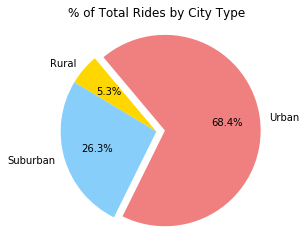

In [252]:
# Calculate Ride Percents
type_and_drivers = joined_data.loc[:, ['type', 'ride_id']]
rides_per_city = type_and_drivers.groupby('type')['ride_id'].count()

# Build Pie Chart
plt.pie(rides_per_city, labels = labels,\
                    colors = colors, explode = explode, autopct = '%1.1f%%',\
        pctdistance = 0.65, startangle = 130, radius = 1.1)

plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pyber_rides_pie_chart.png")
# Show Figure
plt.show()

## Total Drivers by City Type

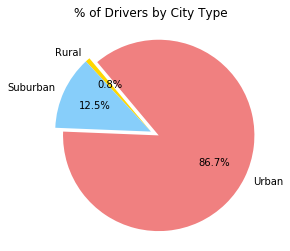

In [253]:
# Calculate Driver Percents
type_and_drivers = joined_data.loc[:, ['type', 'driver_count']]
drivers_per_city = type_and_drivers.groupby('type')['driver_count'].sum()

# Build Pie Charts
plt.pie(drivers_per_city, labels = labels,\
                    colors = colors, explode = explode, autopct = '%1.1f%%',\
        pctdistance = 0.65, startangle = 130, radius = 1.1)
plt.title("% of Drivers by City Type")

# Save Figure
plt.savefig("pyber_drivers_pie_chart")
# Show Figure
plt.show()

"""
Obeservable trends:

1. Even though drivers in suburban/rural cities make up <15% of total drivers, 
these two types of cities account for over 30% of total rides. This indicates that,
on average, rides per driver is higher in suburban/rural areas than in urban ones. It could
be the case that there is high demand for rides in rural/suburban areas, but a low supply of 
drivers is leading to higher ride counts for current drivers. 

2. Despite rural/suburban cities accounting for just over 30% of total rides, these cities
account for over 35% of total fares. This indicates that the average fare-per-ride in suburban/rural
cities is higher than in urban cities. We can see this trend clearly expressed in the bubble plot
with the average fare per city trending downward as the city type moves from rural -> suburban ->
urban. This makes sense, since suburban/rural areas tend to be more spread out than urban areas,
leading to longer average ride distances.

3. Since the ride volume per driver and average fare per ride is higher in rural/suburban cities, it
makes sense to try and boost the number of active drivers in these areas. More market research is needed to confirm the hypothesis that demand in these areas isn't being fully statisfied by the current
supply of drivers, but the higher fare rates in these areas present a great opportunity for increasing revenue. 
"""